In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Code reference for this notebook:
https://github.com/linyue-zz/Unpacking-the-Nuances-of-Londons-Neighbourhood-Change-Gentrification-Trajectories-codes/blob/master/5a%20Clustering%20Ascending%20LSOAs.ipynb

### the variables needed for this part

In [3]:
cluster_gen = pd.read_csv('output_new/cluster_gen.csv')

In [4]:
cluster_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MSOA11CD                              97 non-null     object 
 1   chg_ratio_la_no_children              97 non-null     float64
 2   chg_ratio_la_dependent_children       97 non-null     float64
 3   chg_ratio_la_nondependent_children    97 non-null     float64
 4   chg_ratio_la_retired                  97 non-null     float64
 5   chg_ratio_la_owned                    97 non-null     float64
 6   chg_ratio_la_rented                   97 non-null     float64
 7   chg_ratio_la_migrants                 97 non-null     float64
 8   asc_cluster_yeoJohnson_minmax_labels  97 non-null     int64  
 9   asc_cluster_yeoJohnson_minmax_cat     97 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.7+ KB


In [5]:
gen_id =cluster_gen.drop(cluster_gen.columns[1:10],axis=1)

In [6]:
gen_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSOA11CD  97 non-null     object
dtypes: object(1)
memory usage: 904.0+ bytes


In [7]:
swandlondon_core = pd.read_csv('output_new/swandlondon_core.csv')

In [8]:
swandlondon_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MSOA11CD                             1211 non-null   object 
 1   MSOA11NM                             1211 non-null   object 
 2   LAD11CD                              1211 non-null   object 
 3   LAD11NM                              1211 non-null   object 
 4   RGN11CD                              1211 non-null   object 
 5   RGN11NM                              1211 non-null   object 
 6   MSOA01CD                             1211 non-null   object 
 7   MSOA01NM                             1211 non-null   object 
 8   CHGIND                               1211 non-null   object 
 9   ratio_la_median_price_2001           1211 non-null   float64
 10  ratio_la_median_price_2011           1211 non-null   float64
 11  ratio_r_median_price_2001     

In [9]:
for name in ['median_price','earnings','nssec','qualification','no_children', 'dependent_children','nondependent_children', 'retired', 'student', 'newlybuilt_sale','owned', 'rented','migrants']:
    for ind, row in swandlondon_core.iterrows():
        swandlondon_core.loc[ind,'chg_ratio_la_'+name] = row['ratio_la_' +name+'_2011']-row['ratio_la_' +name+'_2001']
        
        
#code reference: https://www.youtube.com/watch?v=nH1gw-slnOo

In [10]:
swandlondon_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MSOA11CD                             1211 non-null   object 
 1   MSOA11NM                             1211 non-null   object 
 2   LAD11CD                              1211 non-null   object 
 3   LAD11NM                              1211 non-null   object 
 4   RGN11CD                              1211 non-null   object 
 5   RGN11NM                              1211 non-null   object 
 6   MSOA01CD                             1211 non-null   object 
 7   MSOA01NM                             1211 non-null   object 
 8   CHGIND                               1211 non-null   object 
 9   ratio_la_median_price_2001           1211 non-null   float64
 10  ratio_la_median_price_2011           1211 non-null   float64
 11  ratio_r_median_price_2001     

In [11]:
swandlondon_extract3=list(swandlondon_core.iloc[:,[0,9,45,46,47,52,54,55,56,57]].columns)
swandlondon_cluster=swandlondon_core[swandlondon_extract3].copy()

In [12]:
swandlondon_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MSOA11CD                      1211 non-null   object 
 1   ratio_la_median_price_2001    1211 non-null   float64
 2   chg_ratio_la_median_price     1211 non-null   float64
 3   chg_ratio_la_earnings         1211 non-null   float64
 4   chg_ratio_la_nssec            1211 non-null   float64
 5   chg_ratio_la_retired          1211 non-null   float64
 6   chg_ratio_la_newlybuilt_sale  1211 non-null   float64
 7   chg_ratio_la_owned            1211 non-null   float64
 8   chg_ratio_la_rented           1211 non-null   float64
 9   chg_ratio_la_migrants         1211 non-null   float64
dtypes: float64(9), object(1)
memory usage: 94.7+ KB


In [13]:
#swandlondon_cluster.to_csv('output_new/swandlondon_cluster.csv',index=False)

In [14]:
#swandlondon_core.to_csv('output_new/swandlondon_cluster_before.csv',index=False)

In [15]:
gen_cluster =gen_id.merge(swandlondon_cluster, on = "MSOA11CD", how = "left")

In [16]:
gen_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MSOA11CD                      97 non-null     object 
 1   ratio_la_median_price_2001    97 non-null     float64
 2   chg_ratio_la_median_price     97 non-null     float64
 3   chg_ratio_la_earnings         97 non-null     float64
 4   chg_ratio_la_nssec            97 non-null     float64
 5   chg_ratio_la_retired          97 non-null     float64
 6   chg_ratio_la_newlybuilt_sale  97 non-null     float64
 7   chg_ratio_la_owned            97 non-null     float64
 8   chg_ratio_la_rented           97 non-null     float64
 9   chg_ratio_la_migrants         97 non-null     float64
dtypes: float64(9), object(1)
memory usage: 8.3+ KB


In [17]:
gen_cluster.to_csv('output_new/gen_cluster.csv',index=False)

In [18]:
gen_cluster=gen_cluster.set_index("MSOA11CD")

In [19]:
gen_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, E02000008 to E02006931
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ratio_la_median_price_2001    97 non-null     float64
 1   chg_ratio_la_median_price     97 non-null     float64
 2   chg_ratio_la_earnings         97 non-null     float64
 3   chg_ratio_la_nssec            97 non-null     float64
 4   chg_ratio_la_retired          97 non-null     float64
 5   chg_ratio_la_newlybuilt_sale  97 non-null     float64
 6   chg_ratio_la_owned            97 non-null     float64
 7   chg_ratio_la_rented           97 non-null     float64
 8   chg_ratio_la_migrants         97 non-null     float64
dtypes: float64(9)
memory usage: 7.6+ KB


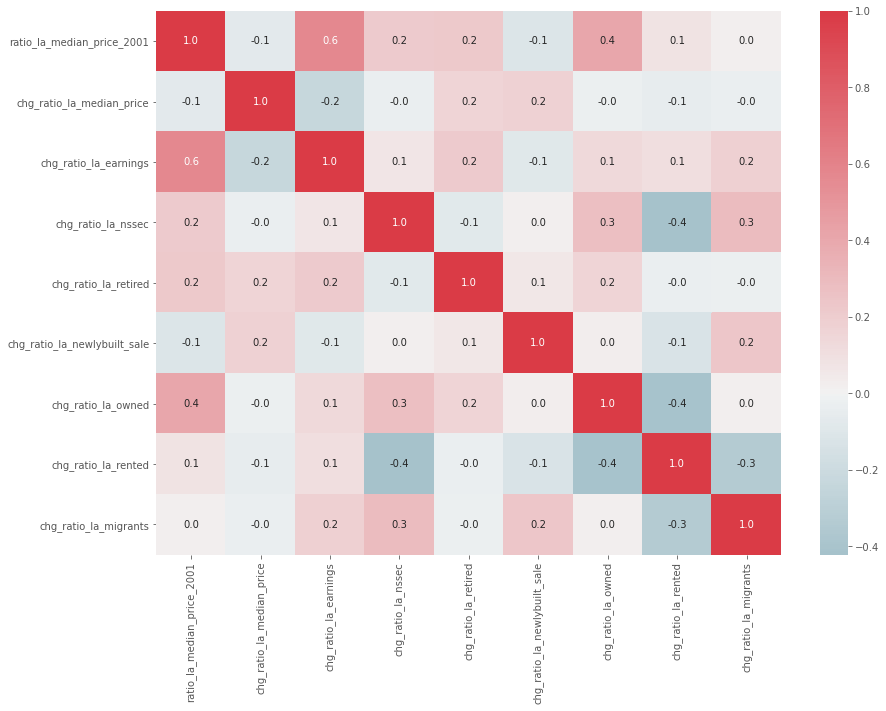

In [20]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(gen_cluster.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

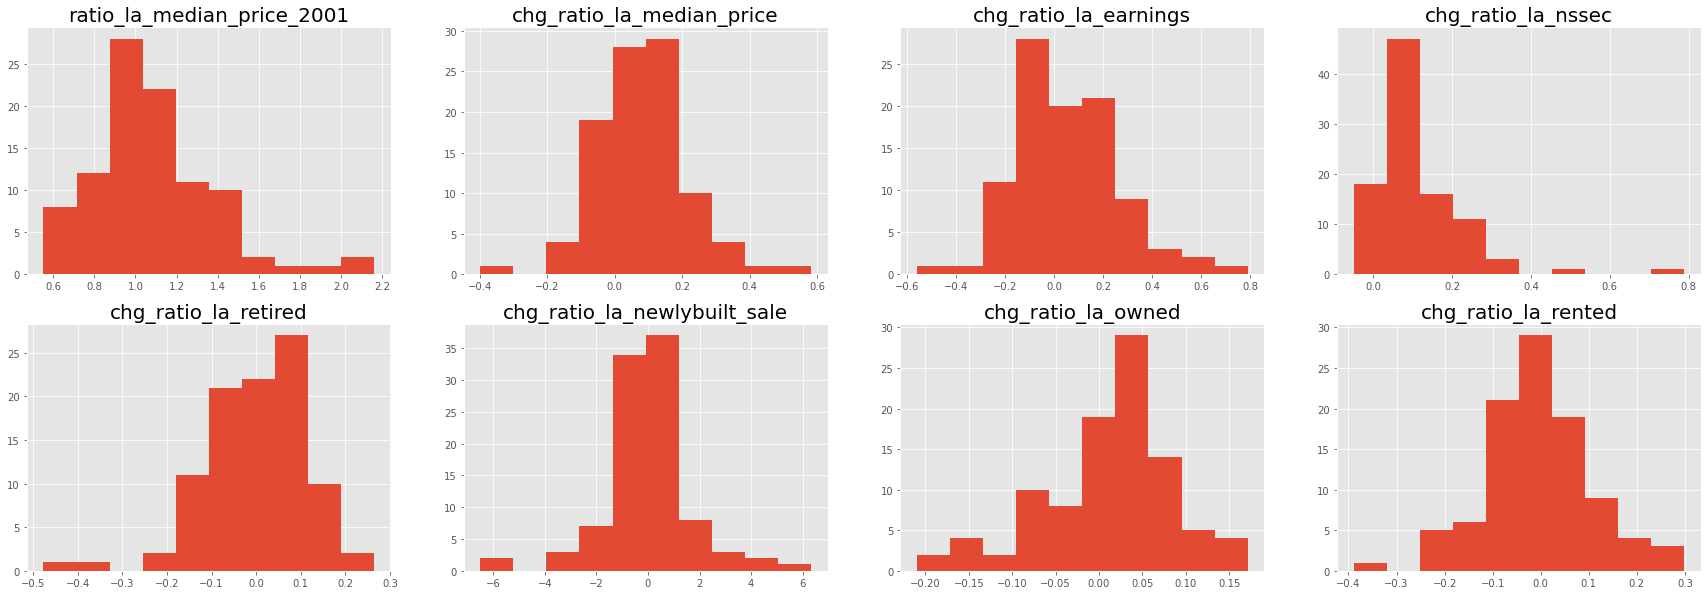

In [21]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(gen_cluster.columns):

            ax.hist(gen_cluster[gen_cluster.columns[counter]], label='{}'.format(gen_cluster.columns[counter]))
            ax.set_title(gen_cluster.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()


In [22]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)

gen_cluster.skew (axis = 0)


ratio_la_median_price_2001      1.135342
chg_ratio_la_median_price       0.303848
chg_ratio_la_earnings           0.574710
chg_ratio_la_nssec              2.537129
chg_ratio_la_retired           -0.864457
chg_ratio_la_newlybuilt_sale   -0.024691
chg_ratio_la_owned             -0.540854
chg_ratio_la_rented            -0.070041
chg_ratio_la_migrants           1.954803
dtype: float64

---

### Data transformation to deal with skewness

#### Yeo-Johnson transformation

In [23]:
# applying the Yeo-Johnson transformation to data variables

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(gen_cluster)

cluster_1_yeoJohnson_np = pt.transform(gen_cluster)


In [24]:
cluster_1_yeoJohnson = pd.DataFrame(cluster_1_yeoJohnson_np, index = gen_cluster.index, columns = gen_cluster.columns)

[Text(0, 0, 'ratio_la_median_price_2001'),
 Text(1, 0, 'chg_ratio_la_median_price'),
 Text(2, 0, 'chg_ratio_la_earnings'),
 Text(3, 0, 'chg_ratio_la_nssec'),
 Text(4, 0, 'chg_ratio_la_retired'),
 Text(5, 0, 'chg_ratio_la_newlybuilt_sale'),
 Text(6, 0, 'chg_ratio_la_owned'),
 Text(7, 0, 'chg_ratio_la_rented'),
 Text(8, 0, 'chg_ratio_la_migrants')]

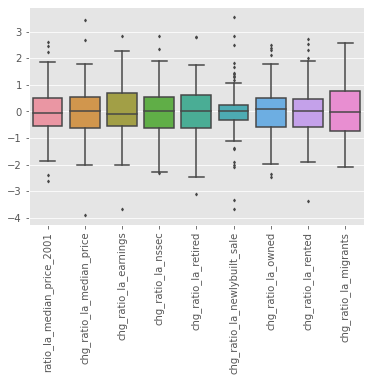

In [25]:
#boxplot of the variables
ax = sns.boxplot( data=cluster_1_yeoJohnson,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.savefig('plot/p3-yeo-box.png',dpi = 200,bbox_inches = 'tight')

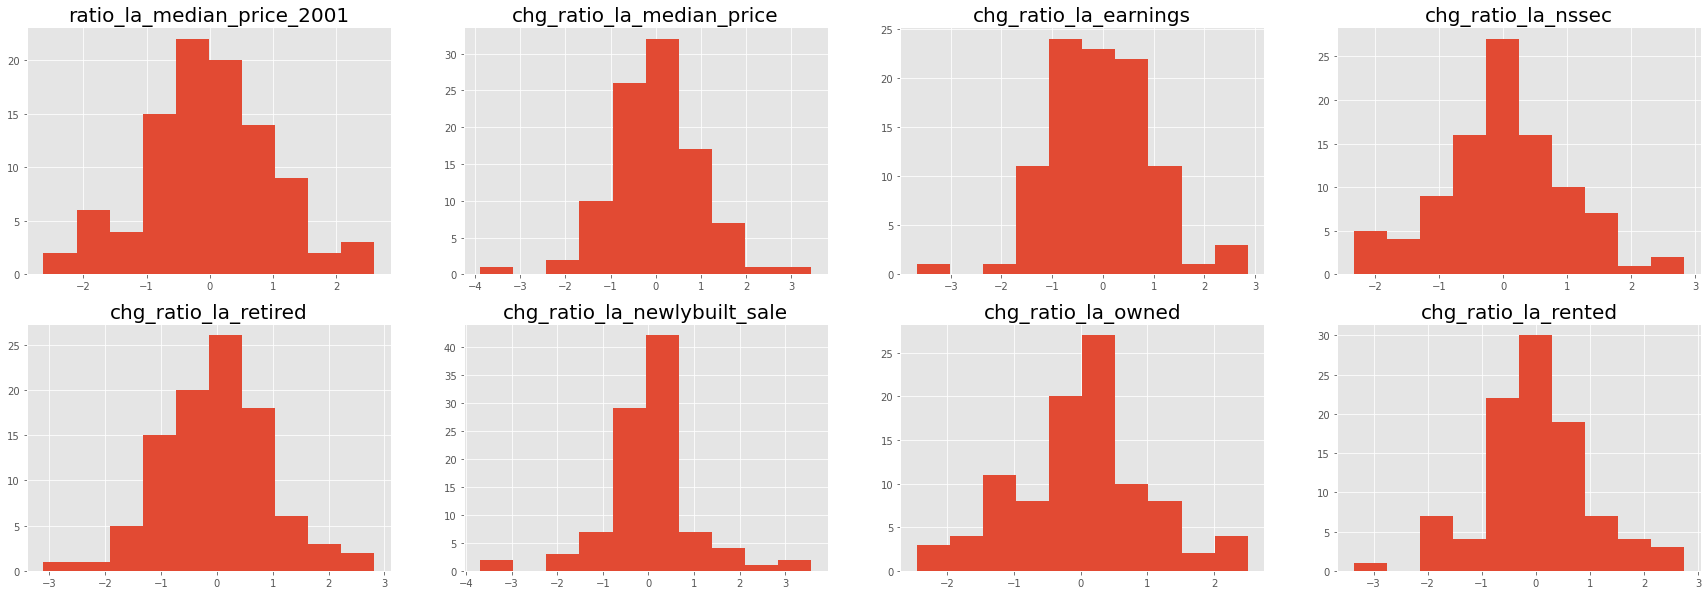

In [26]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_yeoJohnson.columns):

            ax.hist(cluster_1_yeoJohnson[cluster_1_yeoJohnson.columns[counter]], label='{}'.format(cluster_1_yeoJohnson.columns[counter]))
            ax.set_title(cluster_1_yeoJohnson.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
        
        counter += 1
#plt.savefig('plot/p3-yeo-hit.png',dpi = 200,bbox_inches = 'tight')
plt.show()

In [27]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)
cluster_1_yeoJohnson.skew (axis = 0)

ratio_la_median_price_2001     -0.013983
chg_ratio_la_median_price      -0.013012
chg_ratio_la_earnings          -0.062791
chg_ratio_la_nssec             -0.027261
chg_ratio_la_retired            0.043651
chg_ratio_la_newlybuilt_sale   -0.116621
chg_ratio_la_owned              0.015578
chg_ratio_la_rented            -0.003563
chg_ratio_la_migrants           0.059498
dtype: float64

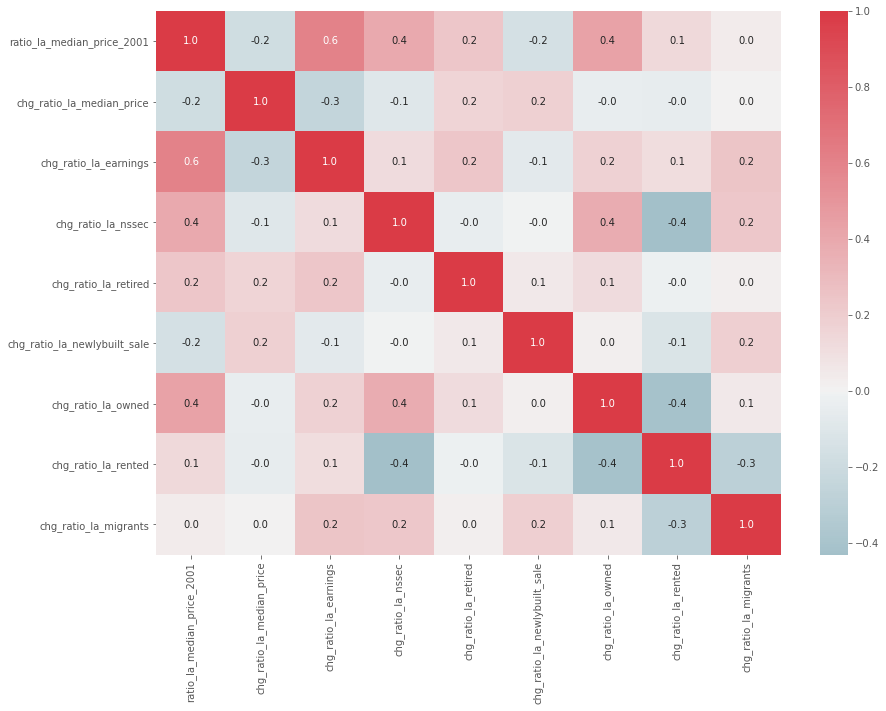

In [28]:
# check for multi-collinearity between variables

fig11, ax = plt.subplots()
fig11.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1_yeoJohnson.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

### Data re-scaling 

#### Yeo-Johnson transformation + RobustScaler

In [29]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
# scaling the stacked data using RobustScaler
Robust_transformer = RobustScaler().fit(cluster_1_yeoJohnson_np)
cluster_1_yeoJohnson_robust_np = Robust_transformer.transform(cluster_1_yeoJohnson_np)
cluster_1_yeoJohnson_robust = pd.DataFrame(cluster_1_yeoJohnson_robust_np, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)

[Text(0, 0, 'ratio_la_median_price_2001'),
 Text(1, 0, 'chg_ratio_la_median_price'),
 Text(2, 0, 'chg_ratio_la_earnings'),
 Text(3, 0, 'chg_ratio_la_nssec'),
 Text(4, 0, 'chg_ratio_la_retired'),
 Text(5, 0, 'chg_ratio_la_newlybuilt_sale'),
 Text(6, 0, 'chg_ratio_la_owned'),
 Text(7, 0, 'chg_ratio_la_rented'),
 Text(8, 0, 'chg_ratio_la_migrants')]

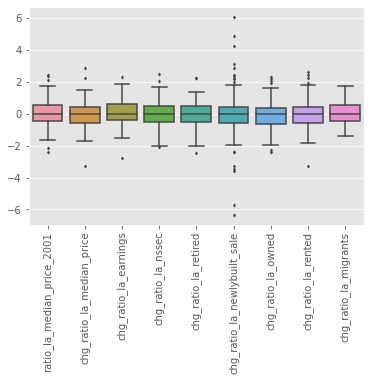

In [30]:
#boxplot of the variables
ax = sns.boxplot( data=cluster_1_yeoJohnson_robust,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.savefig('plot/p3-yeo-box.png',dpi = 200,bbox_inches = 'tight')

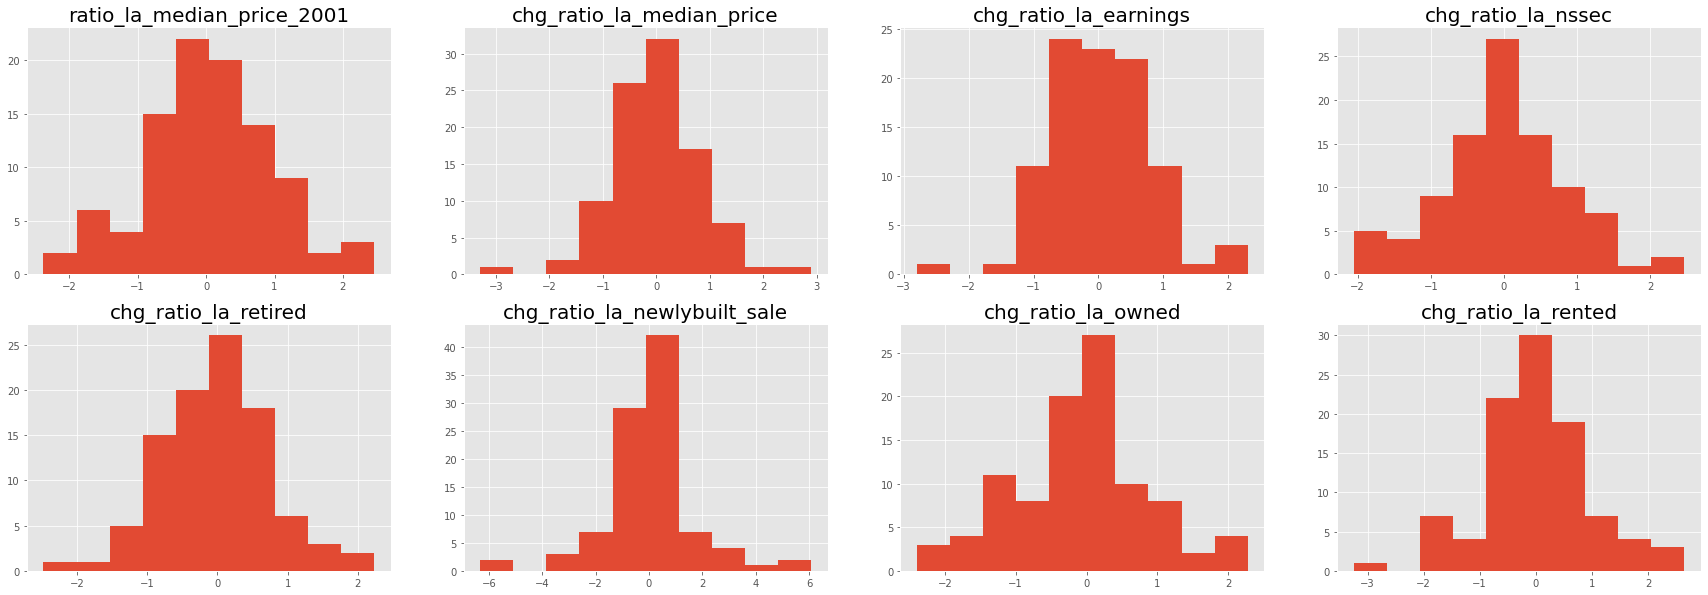

In [31]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_yeoJohnson_robust.columns):

            ax.hist(cluster_1_yeoJohnson_robust[cluster_1_yeoJohnson_robust.columns[counter]], label='{}'.format(cluster_1_yeoJohnson_robust.columns[counter]))
            ax.set_title(cluster_1_yeoJohnson_robust.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
        
        counter += 1
#plt.savefig('plot/p3-yeo-his.png',dpi = 200,bbox_inches = 'tight')
plt.show()

#### Yeo-Johnson transformation + MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler
transformer2 = MinMaxScaler().fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_minmax = transformer2.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_minmax = pd.DataFrame(cluster_1_yeoJohnson_minmax, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)

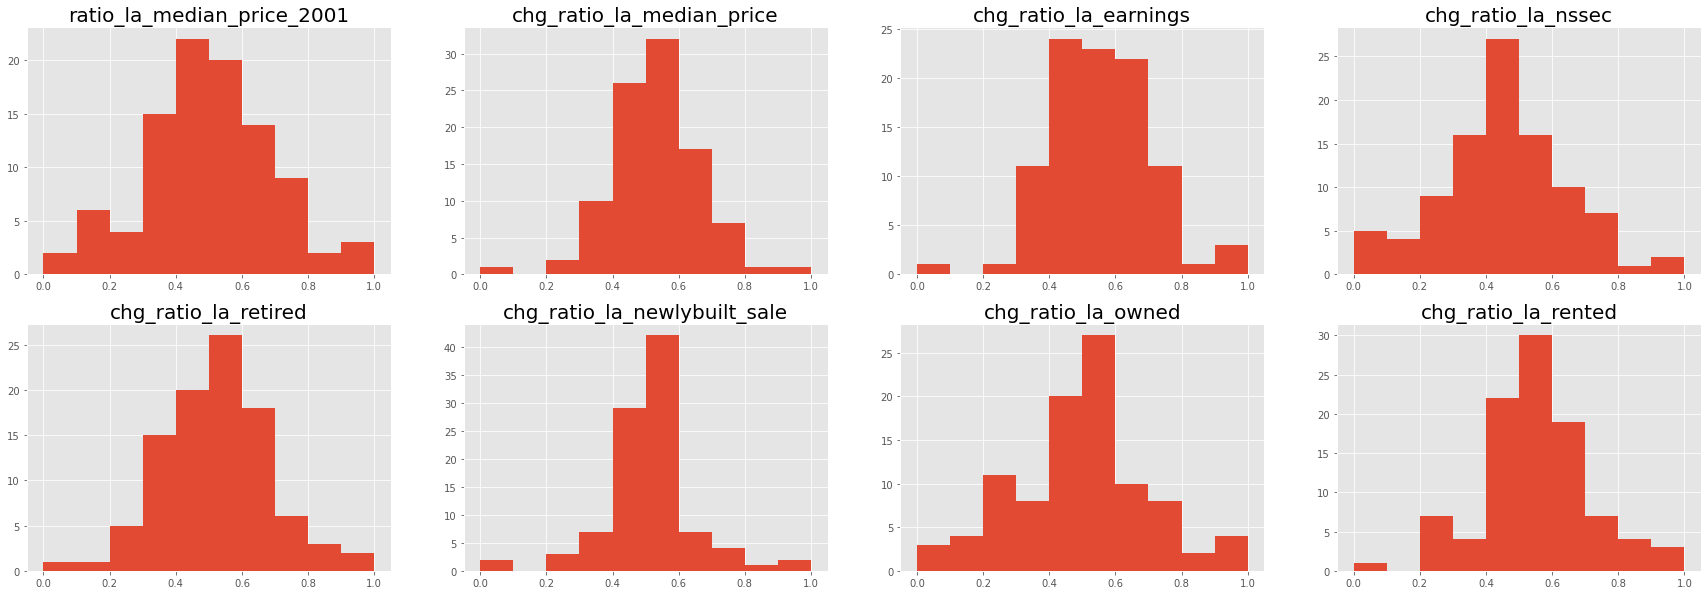

In [33]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_yeoJohnson_minmax.columns):

            ax.hist(cluster_1_yeoJohnson_minmax[cluster_1_yeoJohnson_minmax.columns[counter]], label='{}'.format(cluster_1_yeoJohnson_minmax.columns[counter]))
            ax.set_title(cluster_1_yeoJohnson_minmax.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
#plt.savefig('plot/p3-yeominmax-his.png',dpi = 200,bbox_inches = 'tight')        
plt.show()
        

[Text(0, 0, 'ratio_la_median_price_2001'),
 Text(1, 0, 'chg_ratio_la_median_price'),
 Text(2, 0, 'chg_ratio_la_earnings'),
 Text(3, 0, 'chg_ratio_la_nssec'),
 Text(4, 0, 'chg_ratio_la_retired'),
 Text(5, 0, 'chg_ratio_la_newlybuilt_sale'),
 Text(6, 0, 'chg_ratio_la_owned'),
 Text(7, 0, 'chg_ratio_la_rented'),
 Text(8, 0, 'chg_ratio_la_migrants')]

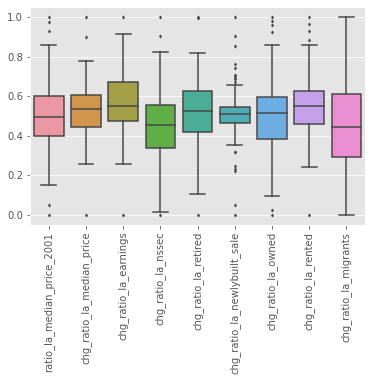

In [34]:
#boxplot of the variables
ax = sns.boxplot( data=cluster_1_yeoJohnson_minmax,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.savefig('plot/p3-yeominmax-box.png',dpi = 200,bbox_inches = 'tight')

#### Clustering

#### Yeo-Johnson transformation

For n_clusters = 2 The average silhouette_score is : 0.14118247187461844
For n_clusters = 3 The average silhouette_score is : 0.12281901173906686
For n_clusters = 4 The average silhouette_score is : 0.1270185932991445
For n_clusters = 5 The average silhouette_score is : 0.1225416900731468
For n_clusters = 6 The average silhouette_score is : 0.12719255421677317
For n_clusters = 7 The average silhouette_score is : 0.12453201858024829
For n_clusters = 8 The average silhouette_score is : 0.11861064768453039
For n_clusters = 9 The average silhouette_score is : 0.12357462746945232
For n_clusters = 10 The average silhouette_score is : 0.12579786115801259


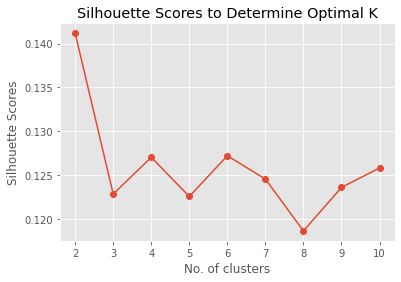

In [35]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1_yeoJohnson)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1_yeoJohnson, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores to Determine Optimal K')
plt.show()

#### Yeo+RobustScaler

For n_clusters = 2 The average silhouette_score is : 0.14493622461833736
For n_clusters = 3 The average silhouette_score is : 0.1549891015921918
For n_clusters = 4 The average silhouette_score is : 0.14686149890383982
For n_clusters = 5 The average silhouette_score is : 0.16640809799967987
For n_clusters = 6 The average silhouette_score is : 0.14887702558239296
For n_clusters = 7 The average silhouette_score is : 0.1702274017652659
For n_clusters = 8 The average silhouette_score is : 0.14473851475751942
For n_clusters = 9 The average silhouette_score is : 0.13137478844084666
For n_clusters = 10 The average silhouette_score is : 0.11584227102812478


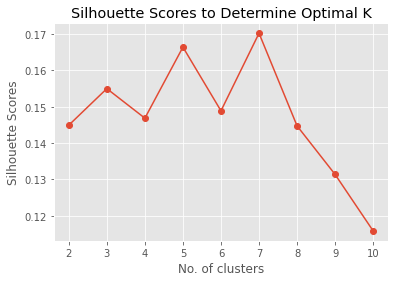

In [36]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1_yeoJohnson_robust)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1_yeoJohnson_robust, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores to Determine Optimal K')
plt.show()

#### Yeo-Johnson transformation + MinMaxScaler

For n_clusters = 2 The average silhouette_score is : 0.15881063516548075
For n_clusters = 3 The average silhouette_score is : 0.14787516809936302
For n_clusters = 4 The average silhouette_score is : 0.13633008692088025
For n_clusters = 5 The average silhouette_score is : 0.1336845881745979
For n_clusters = 6 The average silhouette_score is : 0.12270143739937506
For n_clusters = 7 The average silhouette_score is : 0.11299285680229734
For n_clusters = 8 The average silhouette_score is : 0.12246362000498179
For n_clusters = 9 The average silhouette_score is : 0.12540294692324078
For n_clusters = 10 The average silhouette_score is : 0.12655564259419244


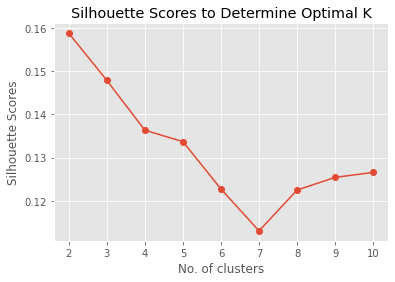

In [37]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1_yeoJohnson_minmax)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1_yeoJohnson_minmax, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores to Determine Optimal K')
plt.show()

#### Compare the quality of clustering using Calinski-Harabasz Index

In [38]:
# creating empty array to hold the performance measure for each cluster derived from individual dataset permutation

permutation = ["yeoJohnson","minmax","yeoJohnson-minmax"]
calinski_harabasz_scores = []

In [39]:
gen_cluster_yeoJohnson_robust_kmeans = KMeans(n_clusters=3, init = "k-means++", random_state=0, n_init=100, max_iter=50).fit(cluster_1_yeoJohnson_robust)
gen_cluster_yeoJohnson_robust_labels = gen_cluster_yeoJohnson_robust_kmeans.labels_
gen_cluster_yeoJohnson_robust_original = gen_cluster[:]
gen_cluster_yeoJohnson_robust_original["gen_cluster_yeoJohnson_robust_labels"]=gen_cluster_yeoJohnson_robust_labels

gen_cluster_yeoJohnson_kmeans = KMeans(n_clusters=2, init = "k-means++", random_state=0, n_init=100, max_iter=50).fit(cluster_1_yeoJohnson)
gen_cluster_yeoJohnson_labels = gen_cluster_yeoJohnson_kmeans.labels_
gen_cluster_yeoJohnson_original = gen_cluster[:]
gen_cluster_yeoJohnson_original["gen_cluster_yeoJohnson_labels"]=gen_cluster_yeoJohnson_labels

gen_cluster_yeoJohnson_minmax_kmeans = KMeans(n_clusters=2, init = "k-means++", random_state=0, n_init=100, max_iter=50).fit(cluster_1_yeoJohnson_minmax)
gen_cluster_yeoJohnson_minmax_labels = gen_cluster_yeoJohnson_minmax_kmeans.labels_
gen_cluster_yeoJohnson_minmax_original = gen_cluster[:]
gen_cluster_yeoJohnson_minmax_original["gen_cluster_yeoJohnson_minmax_labels"]=gen_cluster_yeoJohnson_minmax_labels

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [40]:
# measuring the performance for yeo-johnson dataset permutations

from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.calinski_harabasz_score(gen_cluster_yeoJohnson_robust_original, gen_cluster_yeoJohnson_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(gen_cluster_yeoJohnson_robust_original, gen_cluster_yeoJohnson_robust_labels))

print(metrics.calinski_harabasz_score(gen_cluster_yeoJohnson_original, gen_cluster_yeoJohnson_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(gen_cluster_yeoJohnson_original, gen_cluster_yeoJohnson_labels))

print(metrics.calinski_harabasz_score(gen_cluster_yeoJohnson_minmax_original, gen_cluster_yeoJohnson_minmax_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(gen_cluster_yeoJohnson_minmax_original, gen_cluster_yeoJohnson_minmax_labels))



60.376924953183206
10.678495247092021
11.522624526489272


In [41]:
# extracting cluster details of the best-performing dataset

gen_cluster_yeoJohnson_robust_original.groupby("gen_cluster_yeoJohnson_robust_labels").size()

gen_cluster_yeoJohnson_robust_labels
0    34
1    48
2    15
dtype: int64

In [42]:
# appending cluster labels to main dataset

cluster_1_yeoJohnson_robust["gen_cluster_yeoJohnson_robust_labels"]=gen_cluster_yeoJohnson_robust_labels

In [43]:
# creating a new dataset for plotting purposes

radar_1 = cluster_1_yeoJohnson_robust.groupby("gen_cluster_yeoJohnson_robust_labels").mean().reset_index()

In [44]:
radar_1.head()

,gen_cluster_yeoJohnson_robust_labels,ratio_la_median_price_2001,chg_ratio_la_median_price,chg_ratio_la_earnings,chg_ratio_la_nssec,chg_ratio_la_retired,chg_ratio_la_newlybuilt_sale,chg_ratio_la_owned,chg_ratio_la_rented,chg_ratio_la_migrants
0,0,0.692488,-0.195002,0.530008,0.443629,0.028849,-1.213665,0.428594,-0.325888,0.052035
1,1,-0.378948,0.120879,-0.292652,-0.419915,-0.074565,-0.010214,-0.507136,0.364639,-0.164371
2,2,-0.009383,-0.016354,0.178276,0.261155,0.116608,2.655107,0.125570,-0.431075,0.469647


In [45]:
# check the means of the entire dataset

cluster_1_yeoJohnson_robust.mean()

ratio_la_median_price_2001              0.053756
chg_ratio_la_median_price              -0.011064
chg_ratio_la_earnings                   0.068527
chg_ratio_la_nssec                     -0.011910
chg_ratio_la_retired                   -0.008754
chg_ratio_la_newlybuilt_sale           -0.019879
chg_ratio_la_owned                     -0.081307
chg_ratio_la_rented                    -0.000450
chg_ratio_la_migrants                   0.009527
gen_cluster_yeoJohnson_robust_labels    0.804124
dtype: float64

In [46]:
# appending dataset average values to main dataset

radar_avg = cluster_1_yeoJohnson_robust.drop(columns = ["gen_cluster_yeoJohnson_robust_labels"]).mean().reset_index()

In [47]:
# rename columns for legibility

radar_avg = radar_avg.rename(columns={"index":"var", 0: "value"})

In [48]:
radar_avg.head()

,var,value
0,ratio_la_median_price_2001,0.053756
1,chg_ratio_la_median_price,-0.011064
2,chg_ratio_la_earnings,0.068527
3,chg_ratio_la_nssec,-0.011910
4,chg_ratio_la_retired,-0.008754


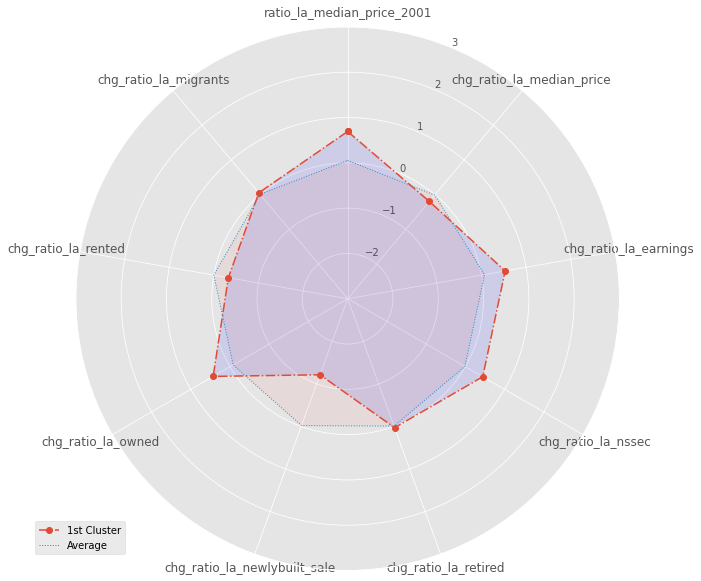

In [49]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-3,3)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="1st Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

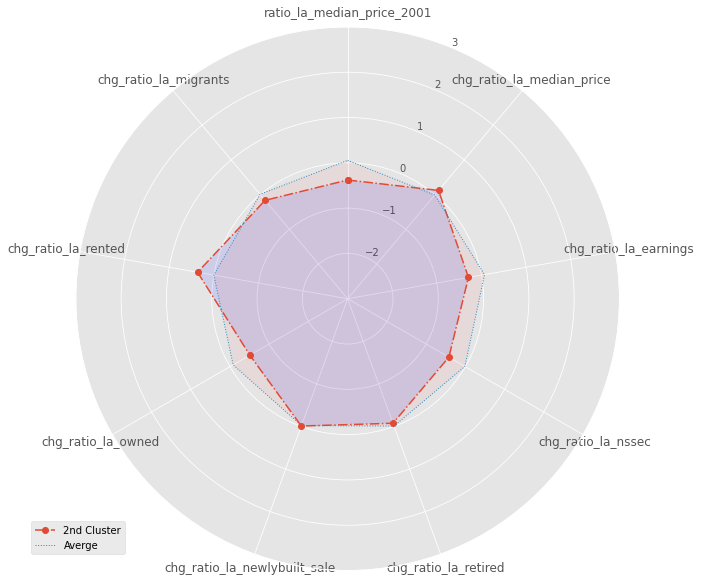

In [50]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 2nd cluster

fig2, ax = plt.subplots()
fig2.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-3,3)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[1,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="2nd Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Averge")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

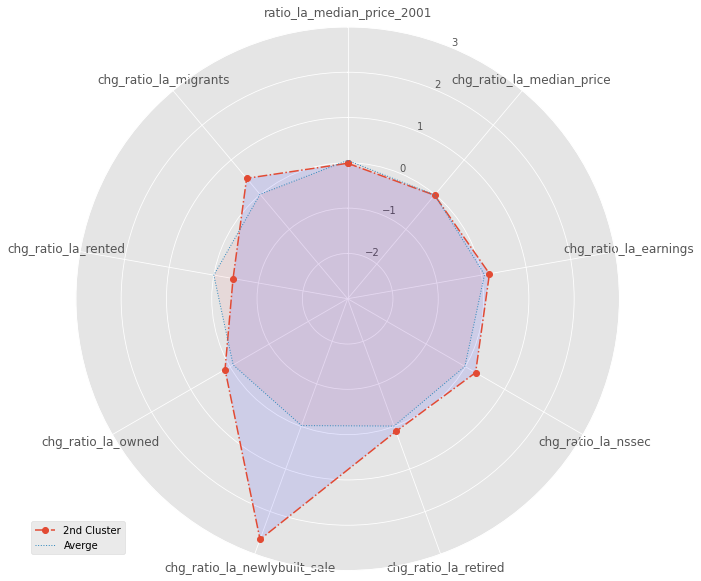

In [51]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 2nd cluster

fig2, ax = plt.subplots()
fig2.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-3,3)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[2,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="2nd Cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Averge")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [52]:
# create new feature column in main dataset to host label categories

gen_cluster_yeoJohnson_robust_cat = gen_cluster_yeoJohnson_robust_original[:].reset_index()
gen_cluster_yeoJohnson_robust_cat["gen_cluster_yeoJohnson_robust_cat"] = ""

In [53]:
gen_cluster_yeoJohnson_robust_cat.head()

,MSOA11CD,ratio_la_median_price_2001,chg_ratio_la_median_price,chg_ratio_la_earnings,chg_ratio_la_nssec,chg_ratio_la_retired,chg_ratio_la_newlybuilt_sale,chg_ratio_la_owned,chg_ratio_la_rented,chg_ratio_la_migrants,gen_cluster_yeoJohnson_robust_labels,gen_cluster_yeoJohnson_robust_cat
0,E02000008,0.933333,0.007843,-0.076862,0.043961,-0.059673,0.000000,0.030368,-0.047626,0.629025,1,
1,E02000010,0.983333,-0.049525,-0.057994,0.153139,-0.077321,-1.552537,-0.000895,-0.030144,0.606451,0,
2,E02000011,0.977722,0.104631,0.072825,-0.023395,0.175810,0.000000,0.011424,0.152373,0.799965,1,
3,E02000013,0.944444,-0.017974,-0.028504,0.099846,0.027754,-0.091236,0.051873,-0.094085,0.425136,1,
4,E02000014,0.944139,-0.008845,-0.071392,0.018008,0.082563,0.000000,-0.002028,-0.024763,0.563095,1,


In [54]:
# parse cluster labels to derive their categories 

for i in range(len(gen_cluster_yeoJohnson_robust_cat)):
    if gen_cluster_yeoJohnson_robust_cat.loc[i, "gen_cluster_yeoJohnson_robust_labels"]==0:
        gen_cluster_yeoJohnson_robust_cat.loc[i, "gen_cluster_yeoJohnson_robust_labels"]="SUPER"
    elif gen_cluster_yeoJohnson_robust_cat.loc[i, "gen_cluster_yeoJohnson_robust_labels"]==1:
        gen_cluster_yeoJohnson_robust_cat.loc[i, "gen_cluster_yeoJohnson_robust_labels"]="MARGINAL"
    elif gen_cluster_yeoJohnson_robust_cat.loc[i, "gen_cluster_yeoJohnson_robust_labels"]==2:
        gen_cluster_yeoJohnson_robust_cat.loc[i, "gen_cluster_yeoJohnson_robust_labels"]="MAIN"


In [55]:
# extract only super gentrifying MSOAs

cluster_SUPER = gen_cluster_yeoJohnson_robust_cat.loc[gen_cluster_yeoJohnson_robust_cat["gen_cluster_yeoJohnson_robust_labels"]=="SUPER"]

In [56]:
# extract only marginal gentrifying MSOAs

cluster_MARGINAL = gen_cluster_yeoJohnson_robust_cat.loc[gen_cluster_yeoJohnson_robust_cat["gen_cluster_yeoJohnson_robust_labels"]=="MARGINAL"]

In [57]:
# extract only mainstream gentrifying MSOAs

cluster_MAIN = gen_cluster_yeoJohnson_robust_cat.loc[gen_cluster_yeoJohnson_robust_cat["gen_cluster_yeoJohnson_robust_labels"]=="MAIN"]

---

#### check the correlation between the level of second home and different topologies of MSOAs

use pca to get a composite change score
; use Spearman Rank correlation

In [58]:
# necessary libraries for PCA
from sklearn.preprocessing import RobustScaler
from sklearn import decomposition  
from sklearn.preprocessing import scale  
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection

In [59]:
cluster_1_yeoJohnson_robust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, E02000008 to E02006931
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ratio_la_median_price_2001            97 non-null     float64
 1   chg_ratio_la_median_price             97 non-null     float64
 2   chg_ratio_la_earnings                 97 non-null     float64
 3   chg_ratio_la_nssec                    97 non-null     float64
 4   chg_ratio_la_retired                  97 non-null     float64
 5   chg_ratio_la_newlybuilt_sale          97 non-null     float64
 6   chg_ratio_la_owned                    97 non-null     float64
 7   chg_ratio_la_rented                   97 non-null     float64
 8   chg_ratio_la_migrants                 97 non-null     float64
 9   gen_cluster_yeoJohnson_robust_labels  97 non-null     int32  
dtypes: float64(9), int32(1)
memory usage: 8.0+ KB


In [60]:
gen_cluster_yeoJohnson_robust_np=cluster_1_yeoJohnson_robust.drop(columns=['gen_cluster_yeoJohnson_robust_labels','ratio_la_median_price_2001']).values

In [61]:
# carry out PCA to derive only the 1st principal component---scaled data

pca = decomposition.PCA(n_components=1)             
pca.fit(gen_cluster_yeoJohnson_robust_np)                      
PCA_scores = pd.DataFrame(pca.transform(gen_cluster_yeoJohnson_robust_np))  

print("Explained variance of the SES score is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.38035


In [62]:
pca_all = decomposition.PCA()             
pca_all.fit(gen_cluster_yeoJohnson_robust_np)                      
print(pca_all.explained_variance_ratio_)

[0.38035028 0.20231651 0.11002049 0.09843207 0.07141302 0.05768337
 0.04966915 0.03011511]


In [63]:
PCA_gen = pd.DataFrame(PCA_scores)
PCA_gen = PCA_gen.rename(columns={0: "PCA_gen"})
gen_cluster_score = gen_cluster.reset_index()

gen_cluster_score["PCA_gen"] = PCA_gen[:]


In [64]:
gen_cluster_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MSOA11CD                      97 non-null     object 
 1   ratio_la_median_price_2001    97 non-null     float64
 2   chg_ratio_la_median_price     97 non-null     float64
 3   chg_ratio_la_earnings         97 non-null     float64
 4   chg_ratio_la_nssec            97 non-null     float64
 5   chg_ratio_la_retired          97 non-null     float64
 6   chg_ratio_la_newlybuilt_sale  97 non-null     float64
 7   chg_ratio_la_owned            97 non-null     float64
 8   chg_ratio_la_rented           97 non-null     float64
 9   chg_ratio_la_migrants         97 non-null     float64
 10  PCA_gen                       97 non-null     float64
dtypes: float64(10), object(1)
memory usage: 8.5+ KB


In [65]:
cor2=swandlondon_core.iloc[:,[0,1,2,3,4,5,6,7,25,26]].copy()
cor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSOA11CD                    1211 non-null   object 
 1   MSOA11NM                    1211 non-null   object 
 2   LAD11CD                     1211 non-null   object 
 3   LAD11NM                     1211 non-null   object 
 4   RGN11CD                     1211 non-null   object 
 5   RGN11NM                     1211 non-null   object 
 6   MSOA01CD                    1211 non-null   object 
 7   MSOA01NM                    1211 non-null   object 
 8   ratio_la_space_vacant_2001  1211 non-null   float64
 9   ratio_la_space_vacant_2011  1211 non-null   float64
dtypes: float64(2), object(8)
memory usage: 94.7+ KB


In [66]:
cor = gen_cluster_score.merge(cor2, on='MSOA11CD', how='left')
cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MSOA11CD                      97 non-null     object 
 1   ratio_la_median_price_2001    97 non-null     float64
 2   chg_ratio_la_median_price     97 non-null     float64
 3   chg_ratio_la_earnings         97 non-null     float64
 4   chg_ratio_la_nssec            97 non-null     float64
 5   chg_ratio_la_retired          97 non-null     float64
 6   chg_ratio_la_newlybuilt_sale  97 non-null     float64
 7   chg_ratio_la_owned            97 non-null     float64
 8   chg_ratio_la_rented           97 non-null     float64
 9   chg_ratio_la_migrants         97 non-null     float64
 10  PCA_gen                       97 non-null     float64
 11  MSOA11NM                      97 non-null     object 
 12  LAD11CD                       97 non-null     object 
 13  LAD11NM

In [67]:
cor['ratio_space_vacant_chg'] = (cor['ratio_la_space_vacant_2011'] - cor['ratio_la_space_vacant_2001'])

In [68]:
cluster_SUPER.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 96
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MSOA11CD                              34 non-null     object 
 1   ratio_la_median_price_2001            34 non-null     float64
 2   chg_ratio_la_median_price             34 non-null     float64
 3   chg_ratio_la_earnings                 34 non-null     float64
 4   chg_ratio_la_nssec                    34 non-null     float64
 5   chg_ratio_la_retired                  34 non-null     float64
 6   chg_ratio_la_newlybuilt_sale          34 non-null     float64
 7   chg_ratio_la_owned                    34 non-null     float64
 8   chg_ratio_la_rented                   34 non-null     float64
 9   chg_ratio_la_migrants                 34 non-null     float64
 10  gen_cluster_yeoJohnson_robust_labels  34 non-null     object 
 11  gen_cluster_yeoJohnso

In [69]:
cluster_SUPER_clean=cluster_SUPER.iloc[:,[0,11]].copy()
cluster_SUPER_clean = cluster_SUPER_clean.merge(cor, on='MSOA11CD', how='left')
cluster_SUPER_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSOA11CD                           34 non-null     object 
 1   gen_cluster_yeoJohnson_robust_cat  34 non-null     object 
 2   ratio_la_median_price_2001         34 non-null     float64
 3   chg_ratio_la_median_price          34 non-null     float64
 4   chg_ratio_la_earnings              34 non-null     float64
 5   chg_ratio_la_nssec                 34 non-null     float64
 6   chg_ratio_la_retired               34 non-null     float64
 7   chg_ratio_la_newlybuilt_sale       34 non-null     float64
 8   chg_ratio_la_owned                 34 non-null     float64
 9   chg_ratio_la_rented                34 non-null     float64
 10  chg_ratio_la_migrants              34 non-null     float64
 11  PCA_gen                            34 non-null     float64
 

In [70]:
cluster_MARGINAL_clean=cluster_MARGINAL.iloc[:,[0,11]].copy()
cluster_MARGINAL_clean = cluster_MARGINAL_clean.merge(cor, on='MSOA11CD', how='left')
cluster_MARGINAL_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSOA11CD                           48 non-null     object 
 1   gen_cluster_yeoJohnson_robust_cat  48 non-null     object 
 2   ratio_la_median_price_2001         48 non-null     float64
 3   chg_ratio_la_median_price          48 non-null     float64
 4   chg_ratio_la_earnings              48 non-null     float64
 5   chg_ratio_la_nssec                 48 non-null     float64
 6   chg_ratio_la_retired               48 non-null     float64
 7   chg_ratio_la_newlybuilt_sale       48 non-null     float64
 8   chg_ratio_la_owned                 48 non-null     float64
 9   chg_ratio_la_rented                48 non-null     float64
 10  chg_ratio_la_migrants              48 non-null     float64
 11  PCA_gen                            48 non-null     float64
 

In [71]:
cluster_MAIN_clean=cluster_MAIN.iloc[:,[0,11]].copy()
cluster_MAIN_clean = cluster_MAIN_clean.merge(cor, on='MSOA11CD', how='left')
cluster_MAIN_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSOA11CD                           15 non-null     object 
 1   gen_cluster_yeoJohnson_robust_cat  15 non-null     object 
 2   ratio_la_median_price_2001         15 non-null     float64
 3   chg_ratio_la_median_price          15 non-null     float64
 4   chg_ratio_la_earnings              15 non-null     float64
 5   chg_ratio_la_nssec                 15 non-null     float64
 6   chg_ratio_la_retired               15 non-null     float64
 7   chg_ratio_la_newlybuilt_sale       15 non-null     float64
 8   chg_ratio_la_owned                 15 non-null     float64
 9   chg_ratio_la_rented                15 non-null     float64
 10  chg_ratio_la_migrants              15 non-null     float64
 11  PCA_gen                            15 non-null     float64
 

In [72]:
from scipy import stats

In [73]:
#calculate Spearman Rank correlation and corresponding p-value

rho, p = stats.spearmanr(cluster_SUPER_clean['PCA_gen'], cluster_SUPER_clean['ratio_space_vacant_chg'])
print(rho)
print(p)

0.21772345301757062
0.2161045467027687


In [74]:
#calculate Spearman Rank correlation and corresponding p-value

rho, p = stats.spearmanr(cluster_MARGINAL_clean['PCA_gen'], cluster_MARGINAL_clean['ratio_space_vacant_chg'])
print(rho)
print(p)

0.019322622666087714
0.8962860893271234


In [75]:
#calculate Spearman Rank correlation and corresponding p-value

rho, p = stats.spearmanr(cluster_MAIN_clean['PCA_gen'], cluster_MAIN_clean['ratio_space_vacant_chg'])
print(rho)
print(p)

-0.1928571428571428
0.4910487016052232


In [76]:
gen_cluster_yeoJohnson_robust_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MSOA11CD                              97 non-null     object 
 1   ratio_la_median_price_2001            97 non-null     float64
 2   chg_ratio_la_median_price             97 non-null     float64
 3   chg_ratio_la_earnings                 97 non-null     float64
 4   chg_ratio_la_nssec                    97 non-null     float64
 5   chg_ratio_la_retired                  97 non-null     float64
 6   chg_ratio_la_newlybuilt_sale          97 non-null     float64
 7   chg_ratio_la_owned                    97 non-null     float64
 8   chg_ratio_la_rented                   97 non-null     float64
 9   chg_ratio_la_migrants                 97 non-null     float64
 10  gen_cluster_yeoJohnson_robust_labels  97 non-null     object 
 11  gen_cluster_yeoJohnso

In [77]:
gen_cluster_yeoJohnson_robust_cat_clean=gen_cluster_yeoJohnson_robust_cat.iloc[:,[0,11]].copy()
gen_cluster_yeoJohnson_robust_cat_clean = gen_cluster_yeoJohnson_robust_cat_clean.merge(cor, on='MSOA11CD', how='left')
gen_cluster_yeoJohnson_robust_cat_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSOA11CD                           97 non-null     object 
 1   gen_cluster_yeoJohnson_robust_cat  97 non-null     object 
 2   ratio_la_median_price_2001         97 non-null     float64
 3   chg_ratio_la_median_price          97 non-null     float64
 4   chg_ratio_la_earnings              97 non-null     float64
 5   chg_ratio_la_nssec                 97 non-null     float64
 6   chg_ratio_la_retired               97 non-null     float64
 7   chg_ratio_la_newlybuilt_sale       97 non-null     float64
 8   chg_ratio_la_owned                 97 non-null     float64
 9   chg_ratio_la_rented                97 non-null     float64
 10  chg_ratio_la_migrants              97 non-null     float64
 11  PCA_gen                            97 non-null     float64
 

In [78]:
### extract only gentrifying MSOAs in SW

cluster_SW = gen_cluster_yeoJohnson_robust_cat_clean.loc[gen_cluster_yeoJohnson_robust_cat_clean["RGN11CD"]=="E12000009"]

In [79]:
### extract only gentrifying MSOAs in London

cluster_London = gen_cluster_yeoJohnson_robust_cat_clean.loc[gen_cluster_yeoJohnson_robust_cat_clean["RGN11CD"]=="E12000007"]

In [80]:
#calculate Spearman Rank correlation and corresponding p-value

rho, p = stats.spearmanr(cluster_SW['PCA_gen'], cluster_SW['ratio_space_vacant_chg'])
print(rho)
print(p)

-0.07719298245614034
0.7534433450404967


In [81]:
#calculate Spearman Rank correlation and corresponding p-value

rho, p = stats.spearmanr(cluster_London['PCA_gen'], cluster_London['ratio_space_vacant_chg'])
print(rho)
print(p)

0.13089442203366256
0.25333489459560715
